In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.gridspec import GridSpec
import statsmodels.api as sm

In [ ]:
!pip install calplot
import matplotlib.colors as mc
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import calplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8117 sha256=6a442e123530c25efcc0265f10146b3f86d3965946d2d6b35124fca86490acb4
  Stored in directory: /root/.cache/pip/wheels/77/75/32/a518a4a1421776a93e1ede33cb8dac474095bf31fed7e4e22c
Successfully built calplot


In [ ]:
pip install -U nltk

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from wordcloud import WordCloud

### **DATA SCHEME **

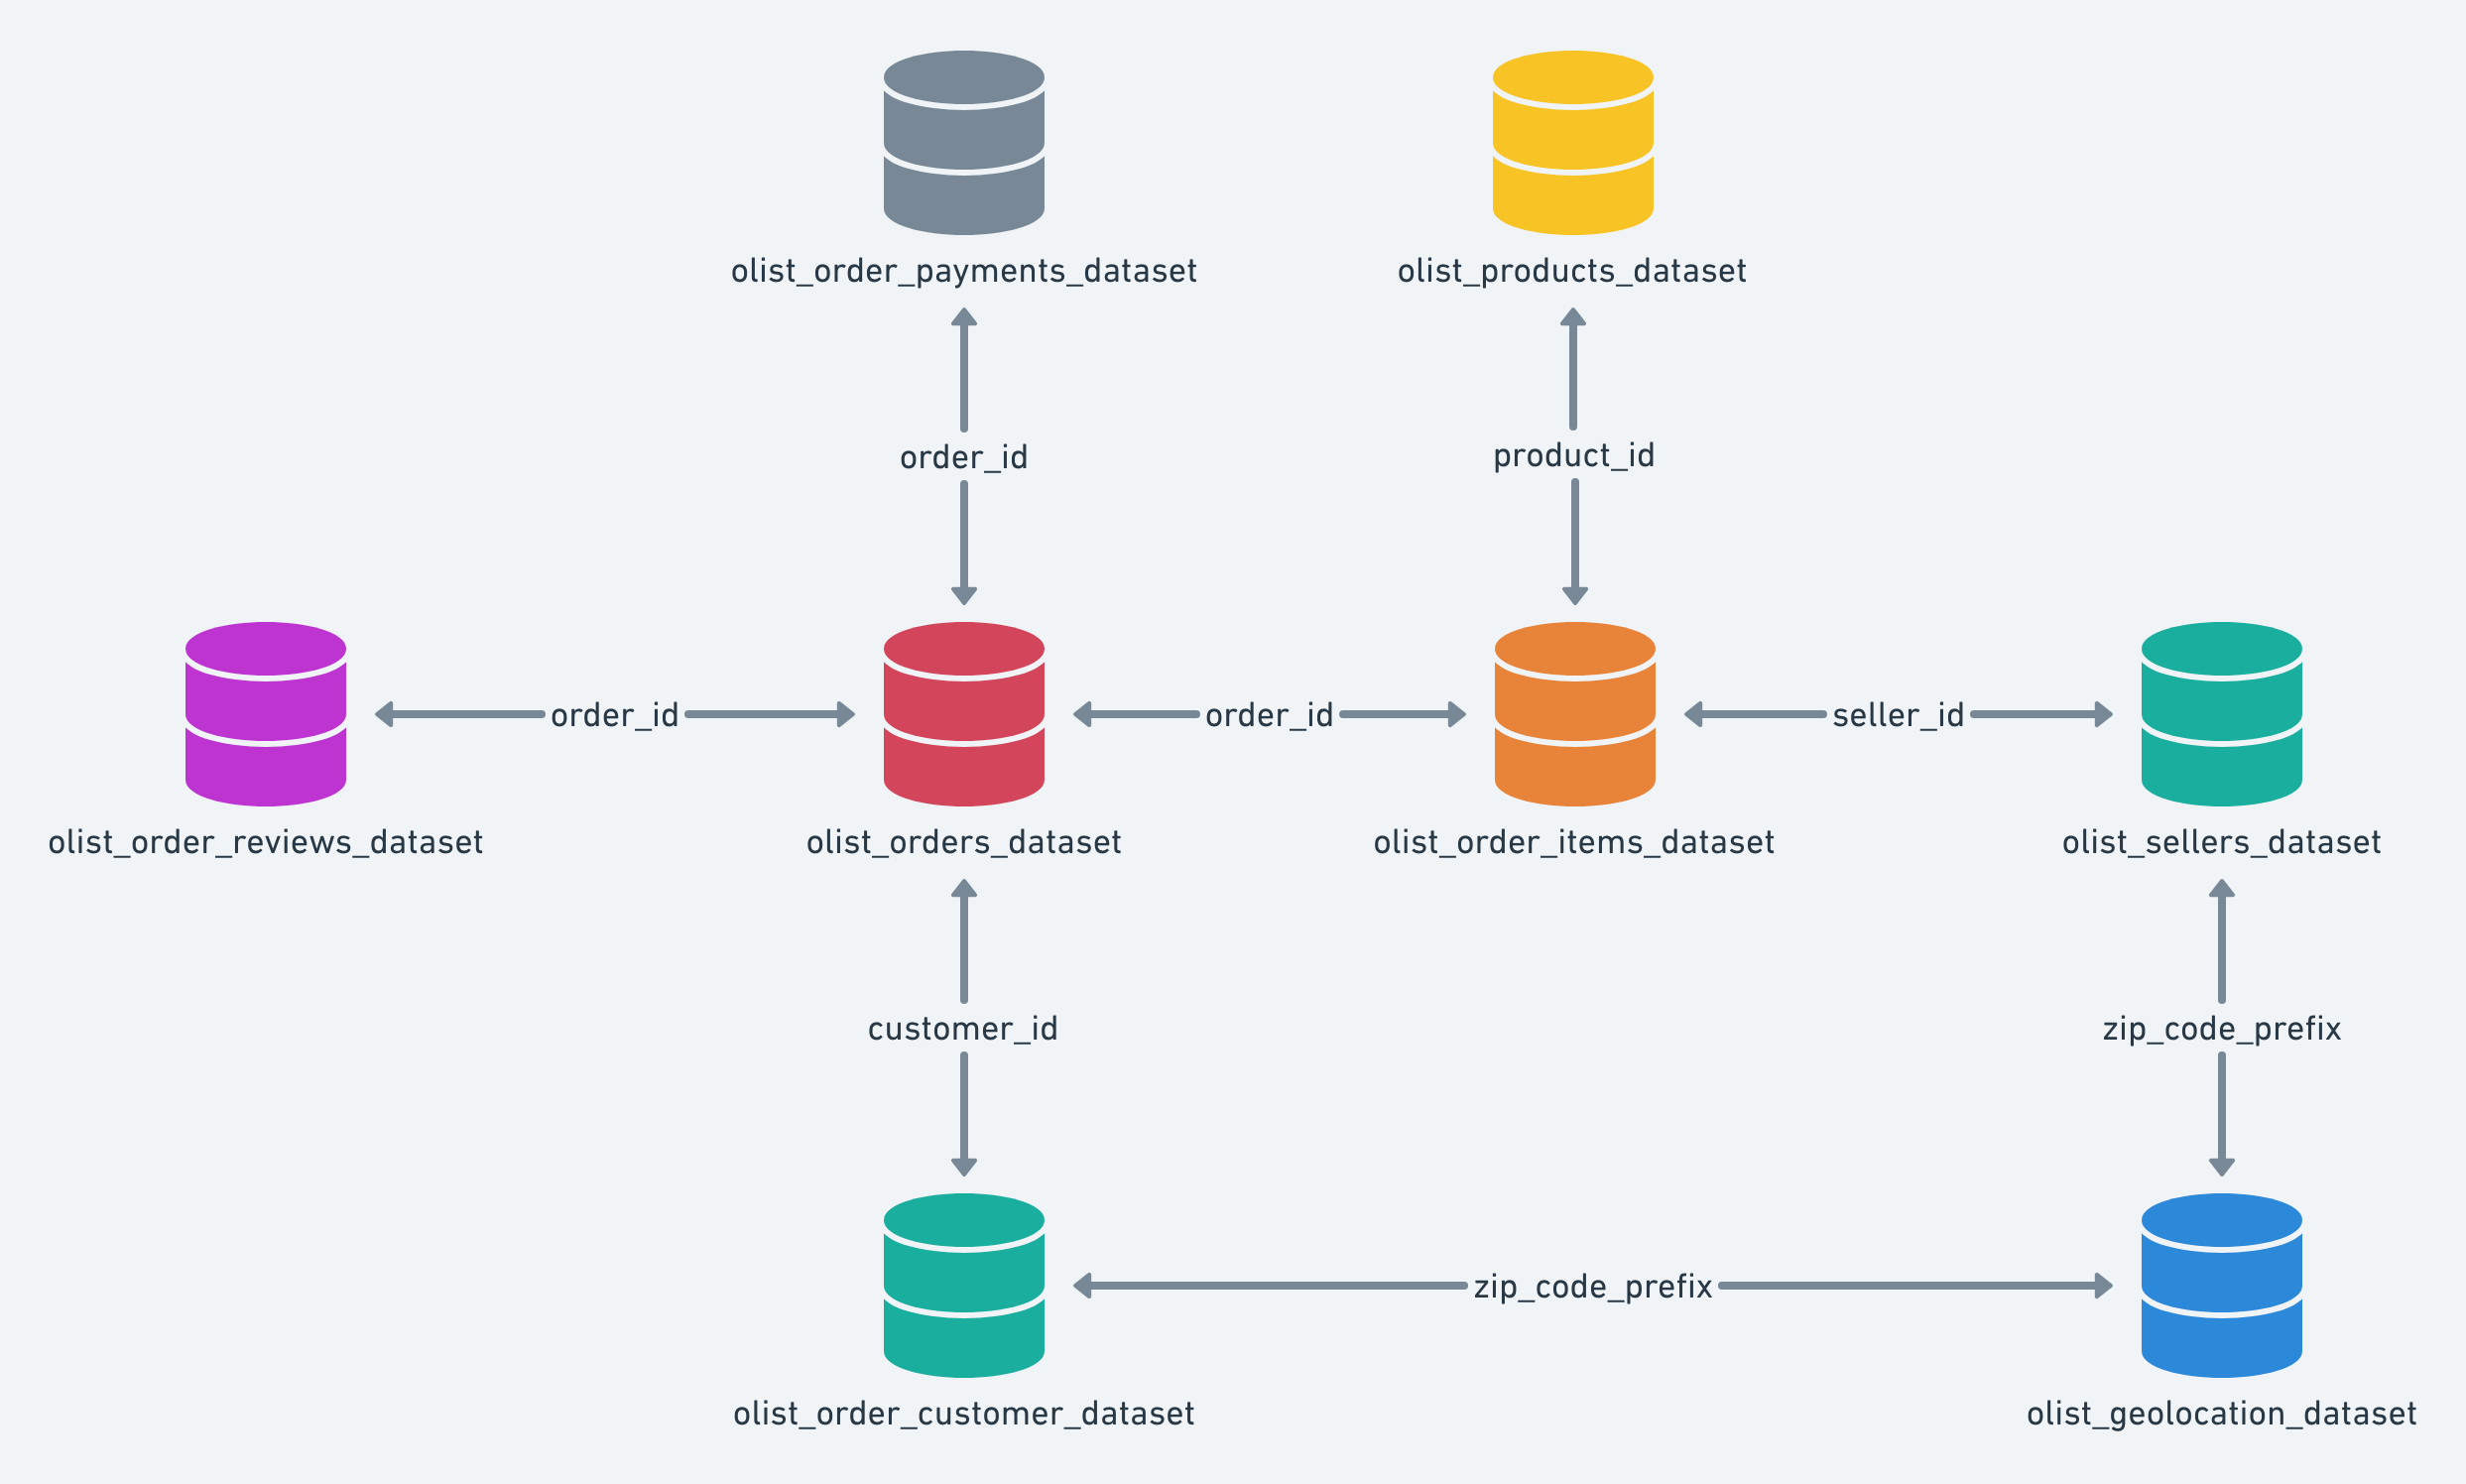

In [ ]:
path ="/content/drive/MyDrive/Data Analysis/olist_orders_dataset.csv"
df_order = pd.read_csv(path)
path1 ="/content/drive/MyDrive/Data Analysis/olist_products_dataset.csv"
df_product = pd.read_csv(path1)
path2= "/content/drive/MyDrive/Data Analysis/olist_geolocation_dataset.csv"
df_geolocation = pd.read_csv(path2)
path3 = "/content/drive/MyDrive/Data Analysis/olist_order_items_dataset.csv"
df_item = pd.read_csv(path3)
path4 = "/content/drive/MyDrive/Data Analysis/olist_order_payments_dataset.csv"
df_payment = pd.read_csv(path4)
path5 = "/content/drive/MyDrive/Data Analysis/olist_order_reviews_dataset.csv"
df_review = pd.read_csv(path5)
path6 = "/content/drive/MyDrive/Data Analysis/olist_customers_dataset.csv"
df_customer = pd.read_csv(path6)
path7 = "/content/drive/MyDrive/Data Analysis/olist_sellers_dataset (1).csv"
df_seller = pd.read_csv(path7)
path8 = "/content/drive/MyDrive/Data Analysis/product_category_name_translation (1).csv"
df_cat = pd.read_csv(path8)

In [ ]:
path9 = "/content/drive/MyDrive/Data Analysis/Amazondata.csv"
df_amazon = pd.read_csv(path9)

<ipython-input-7-43f88a26ce4f>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_amazon = pd.read_csv(path9)


# **DATA CLEANING AND EXPLOTATION**

# **Customer Data**

In [ ]:
df_customer.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
df_customer.describe(include='object')

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [ ]:
df_unique = df_customer.merge(df_order, on = 'customer_id')
# Sequential orders analysis
a = df_unique.groupby('customer_unique_id')['order_id'].count().reset_index()
a.columns = ['customer_unique_id', 'total_orders']
a.sort_values(by = 'total_orders')
total_orders_count = a['total_orders'].value_counts().reset_index()
b = df_unique['customer_unique_id'].nunique()
total_orders_count['percentage'] = (total_orders_count['total_orders'] / b)*100
total_orders_count

,total_orders,count,percentage
0,1,93099,0.001041
1,2,2745,0.002081
2,3,203,0.003122
3,4,30,0.004163
4,5,8,0.005203
5,6,6,0.006244
6,7,3,0.007284
7,9,1,0.009366
8,17,1,0.017691


# **Order Data**

In [ ]:
#convert date data into datetime64
df_order['order_purchase_timestamp'] = pd.to_datetime(df_order['order_purchase_timestamp'])
df_order['order_approved_at'] = pd.to_datetime(df_order['order_approved_at'])
df_order['order_delivered_carrier_date'] = pd.to_datetime(df_order['order_delivered_carrier_date'])
df_order['order_delivered_customer_date'] = pd.to_datetime(df_order['order_delivered_customer_date'])
df_order['order_estimated_delivery_date'] = pd.to_datetime(df_order['order_estimated_delivery_date'])



In [ ]:
df_order['purchased_approved'] = (df_order.order_approved_at -df_order.order_purchase_timestamp).dt.seconds
df_order['transfer'] = (df_order.order_delivered_carrier_date - df_order.order_approved_at).dt.days
df_order['delivered'] = (df_order.order_delivered_customer_date - df_order.order_delivered_carrier_date).dt.days
df_order['delivered_estimated'] = (df_order.order_estimated_delivery_date - df_order.order_delivered_customer_date).dt.days
df_order['purchased_delivered'] = (df_order.order_delivered_customer_date - df_order.order_purchase_timestamp).dt.days
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_approved,transfer,delivered,delivered_estimated,purchased_delivered
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,642.0,2.0,6.0,7.0,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,24170.0,0.0,12.0,5.0,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,994.0,0.0,9.0,17.0,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1073.0,3.0,9.0,12.0,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3710.0,0.0,1.0,9.0,2.0


In [ ]:
df_order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
purchased_approved                160
transfer                         1797
delivered                        2966
delivered_estimated              2965
purchased_delivered              2965
dtype: int64

In [ ]:
df_order.describe(include = np.number)

,purchased_approved,transfer,delivered,delivered_estimated,purchased_delivered
count,99281.000000,97644.000000,96475.000000,96476.000000,96476.000000
mean,14198.031496,2.301749,8.878310,10.876881,12.094086
std,23663.448160,3.560283,8.746088,10.183854,9.551746
min,0.000000,-172.000000,-17.000000,-189.000000,0.000000
25%,755.000000,0.000000,4.000000,6.000000,6.000000
50%,1169.000000,1.000000,7.000000,11.000000,10.000000
75%,17166.000000,3.000000,12.000000,16.000000,15.000000
max,86399.000000,125.000000,205.000000,146.000000,209.000000


 Orders that are approved after the transfer to the delivery day might not necessarily be fake; there could be various reasons for this delay. Sellers might forget confirm but direct tranfer, or bring to drop-off point without confirmation.

However, if there are instances where the delivered date precedes the transfer date, that could indeed indicate falsified data. Hence, drop these orders for data cleaning







In [ ]:
falsified = df_order[df_order.delivered < 0].index
df_order.drop(index = falsified, inplace = True)

**Dealing with missing data**
Obtaining a missing dates value among Olist orders however all orders have purchase time. So create a hypothesis that: The parcels was in delivery when Olist release this dataset. Hence, most of missing data should be concentrated in the last quantitle of dataset.

<ipython-input-16-a3f654668640>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  null_plot.set_xticklabels(null_plot.get_xticklabels(), rotation=30)


Text(0.5, 1.0, 'Missing Value Orders')

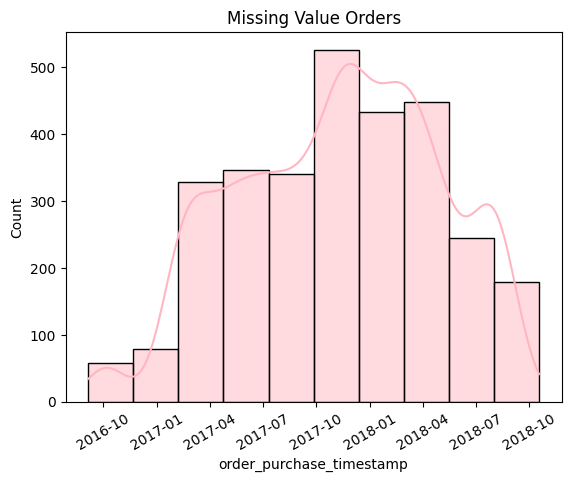

In [ ]:
null_plot = sns.histplot(data=df_order[df_order.isnull().any(axis=1)], x='order_purchase_timestamp', kde = True, bins = 10, color = 'lightpink')
null_plot.set_xticklabels(null_plot.get_xticklabels(), rotation=30)
null_plot.set_title('Missing Value Orders')

Figure 'Missing Value Orders' depicts a random distribution, not the right-skewed concentration in upper quantiles that was hypothesized. Checking order status and review

<ipython-input-17-6194daef6ce4>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  missing_status.set_xticklabels(missing_status.get_xticklabels(), rotation=30)


[Text(0, 0, '2015'),
 Text(0, 0, '211'),
 Text(0, 0, '218'),
 Text(0, 0, '159'),
 Text(0, 0, '277')]

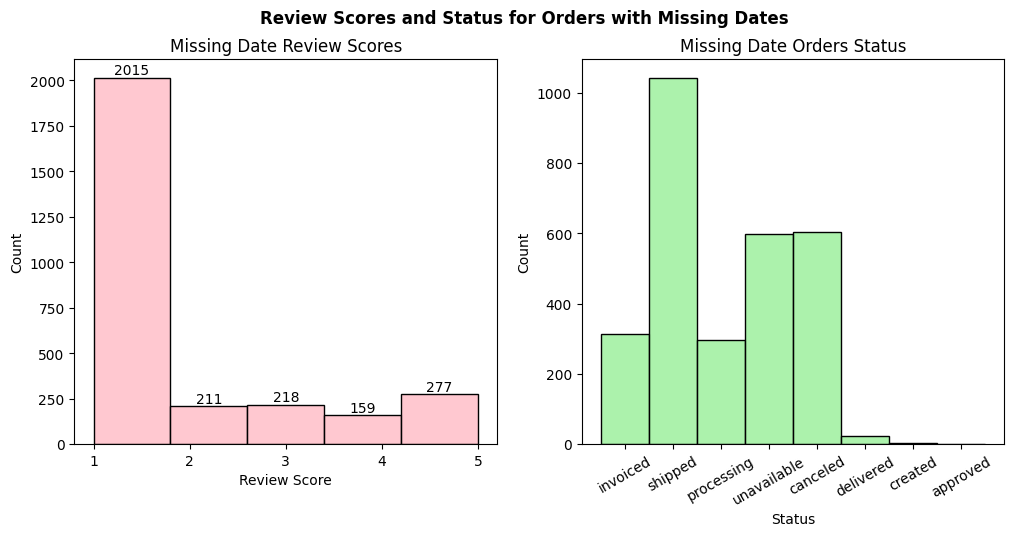

In [ ]:
test = df_order[df_order.isnull().any(axis=1)]
df_test = test.merge(df_review, on = 'order_id')
figure, axes = plt.subplots(1, 2, figsize=(12,5))
figure.suptitle('Review Scores and Status for Orders with Missing Dates',fontweight='bold' )
axes[0].set_title('Missing Date Review Scores')
axes[1].set_title('Missing Date Orders Status')
axes[0].set_xticks([1,2,3,4,5])
axes[0].set_xlabel('Review Score')
axes[1].set_xlabel('Status')
missing_reviews = sns.histplot(data=df_test, x='review_score', bins = 5, ax = axes[0], color = 'lightpink')
missing_status = sns.histplot(data=df_test['order_status'], bins = 5, ax = axes[1], color = 'lightgreen')
missing_status.set_xticklabels(missing_status.get_xticklabels(), rotation=30)
missing_reviews.bar_label(missing_reviews.containers[0])



The records with missing delivery timestamps were retained for analysis rather than excluded, since delivery performance significantly impacts customer experience.

In [ ]:
'''purchase_month = df_order['order_purchase_timestamp'].dt.strftime('%Y-%m')
plt.figure(figsize=(13, 7))
Total_order= sns.lineplot(data=purchase_month.value_counts().sort_index(),linewidth=2)
Total_order.set_xticklabels(Total_order.get_xticklabels(), rotation=30)
Total_order.set_ylabel('Number of orders', size = 8)
Total_order.set_title('Total Orders in Brazilian E-Commerce', size=10, color='dimgrey')
plt.show()'''

"purchase_month = df_order['order_purchase_timestamp'].dt.strftime('%Y-%m')\nplt.figure(figsize=(13, 7))\nTotal_order= sns.lineplot(data=purchase_month.value_counts().sort_index(),linewidth=2)\nTotal_order.set_xticklabels(Total_order.get_xticklabels(), rotation=30)\nTotal_order.set_ylabel('Number of orders', size = 8)\nTotal_order.set_title('Total Orders in Brazilian E-Commerce', size=10, color='dimgrey')\nplt.show()"

In [ ]:
'''order_hour = df_order.groupby(df_order["order_purchase_timestamp"].dt.hour)["order_id"].count()
order_hour = order_hour.reset_index().sort_values(by="order_purchase_timestamp", ascending=False)
order_hour.rename(columns={"order_id":"Total Orders", "order_purchase_timestamp": "Hour of Day"}, inplace=True)'''

'order_hour = df_order.groupby(df_order["order_purchase_timestamp"].dt.hour)["order_id"].count()\norder_hour = order_hour.reset_index().sort_values(by="order_purchase_timestamp", ascending=False)\norder_hour.rename(columns={"order_id":"Total Orders", "order_purchase_timestamp": "Hour of Day"}, inplace=True)'

In [ ]:
'''# Orders by day of the week
order_dow = df_order.groupby(df_order["order_purchase_timestamp"].dt.day_name())["order_id"]
order_dow = order_dow.count().reset_index()
order_dow.rename(columns={"order_id":"Total Orders", "order_purchase_timestamp": "Weekday Name"}, inplace=True)
order_dow = order_dow.sort_values(by="Total Orders", ascending=False)'''

'# Orders by day of the week\norder_dow = df_order.groupby(df_order["order_purchase_timestamp"].dt.day_name())["order_id"]\norder_dow = order_dow.count().reset_index()\norder_dow.rename(columns={"order_id":"Total Orders", "order_purchase_timestamp": "Weekday Name"}, inplace=True)\norder_dow = order_dow.sort_values(by="Total Orders", ascending=False)'

In [ ]:
'''fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for orders by hour
sns.barplot(x="Hour of Day", y="Total Orders", data=order_hour, palette='crest_r', ax=axs[0])
axs[0].set_title("Orders by Hour")

# Bar plot for orders by day of week
sns.barplot(x="Weekday Name", y="Total Orders", data=order_dow, palette='crest_r', ax=axs[1])
axs[1].set_xlabel('Day in Week')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=30)
axs[1].set_title("Orders count by Day of Week")

# Display the combined chart
plt.show()'''

'fig, axs = plt.subplots(1, 2, figsize=(12, 6))\n\n# Bar plot for orders by hour\nsns.barplot(x="Hour of Day", y="Total Orders", data=order_hour, palette=\'crest_r\', ax=axs[0])\naxs[0].set_title("Orders by Hour")\n\n# Bar plot for orders by day of week\nsns.barplot(x="Weekday Name", y="Total Orders", data=order_dow, palette=\'crest_r\', ax=axs[1])\naxs[1].set_xlabel(\'Day in Week\')\naxs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=30)\naxs[1].set_title("Orders count by Day of Week")\n\n# Display the combined chart\nplt.show()'

# **Product Data**

In [ ]:
df_product.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
df_product.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Due to un-detected product item information which may cause ineffeciency, hence, dropping these missing data for analysis convenience. Next drop some unused columns

In [ ]:
df_product = df_product[~df_product['product_category_name'].isna()]
df_product.drop(columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty'])

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,700.0,31.0,13.0,20.0


# **Order Item Data**

In [ ]:
df_item.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

# **Category**

In [ ]:
unique_values = df_cat['product_category_name_english'].unique()
print(unique_values)

['health_beauty' 'computers_accessories' 'auto' 'bed_bath_table'
 'furniture_decor' 'sports_leisure' 'perfumery' 'housewares' 'telephony'
 'watches_gifts' 'food_drink' 'baby' 'stationery' 'tablets_printing_image'
 'toys' 'fixed_telephony' 'garden_tools' 'fashion_bags_accessories'
 'small_appliances' 'consoles_games' 'audio' 'fashion_shoes' 'cool_stuff'
 'luggage_accessories' 'air_conditioning'
 'construction_tools_construction'
 'kitchen_dining_laundry_garden_furniture' 'costruction_tools_garden'
 'fashion_male_clothing' 'pet_shop' 'office_furniture' 'market_place'
 'electronics' 'home_appliances' 'party_supplies' 'home_confort'
 'costruction_tools_tools' 'agro_industry_and_commerce'
 'furniture_mattress_and_upholstery' 'books_technical' 'home_construction'
 'musical_instruments' 'furniture_living_room' 'construction_tools_lights'
 'industry_commerce_and_business' 'food' 'art' 'furniture_bedroom'
 'books_general_interest' 'construction_tools_safety'
 'fashion_underwear_beach' 'fashion_

In [ ]:
#Classify all categories to 9 main categories
def product_cat(x):
  if x in ['computers_accessories','auto','telephony','watches_gifts','tablets_printing_image','fixed_telephony','consoles_games',
           'audio','air_conditioning','electronics','computers','signaling_and_security','security_and_services']:
           return 'Electronics'
  elif x in ['health_beauty','perfumery','diapers_and_hygiene']:
           return 'Beauty'
  elif x in ['bed_bath_table','furniture_decor','furniture_living_room','office_furniture', 'kitchen_dining_laundry_garden_furniture',
             'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
            return 'Furniture'
  elif x in ['sports_leisure','toys','cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo',
             'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
             return 'Entertainment'
  elif x in ['food_drink','drinks', 'food']:
             return 'Food & Beverage'
  elif x in ['baby','fashion_bags_accessories','fashion_shoes','cool_stuff','luggage_accessories',
             'fashio_female_clothing', 'fashion_male_clothing','fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes']:
             return 'Fashion'
  elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
             return 'Book & Stationary'
  elif x in ['housewares', 'home_confort','home_comfort_2', 'home_appliances', 'home_appliances_2', 'flowers',
             'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
             return 'Home Appliances'
  elif x in ['construction_tools_safety','construction_tools_construction', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'
df_cat['product_cat'] = df_cat.product_category_name_english.apply(product_cat)






# **Geolocation Data**



In [ ]:
''' Through obtainning duplicate data of same zip code but more than 2 locations, group by zipcode.   '''
#Clean data for geolocation
df_geolocation = df_geolocation.groupby('geolocation_zip_code_prefix').agg({'geolocation_lat'  : 'max','geolocation_lng'  : 'max'})

In [ ]:
# Top 10 station of customers' orders
df_customerorder = df_customer.merge(df_geolocation, left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix')
df_customerorder.dropna()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.468849,-47.382173
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.468849,-47.382173
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.468849,-47.382173
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.468849,-47.382173
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.468849,-47.382173
...,...,...,...,...,...,...,...
99158,0b7a30ba373aeb55cf28add5b5477956,8c8173e547e020f411aa55b2fceed861,87145,paicandu,PR,-23.501620,-52.150755
99159,ff6b440b2465bfaef05c675efb48cd15,e38a27b979a552e019e297ecc22dc67b,98860,eugenio de castro,RS,-28.525494,-54.144722
99160,3f7029d9b98a47370cd5f3a97adcbccd,5894d202cc869b4ec460fce3c6ed8cb5,5538,sao paulo,SP,-23.587405,-46.736508
99161,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.821692,-49.243077


<ipython-input-30-2f1a88b331d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = df_customerorder.customer_city.value_counts().index[:10],x=top_10_city, palette= 'crest_r')


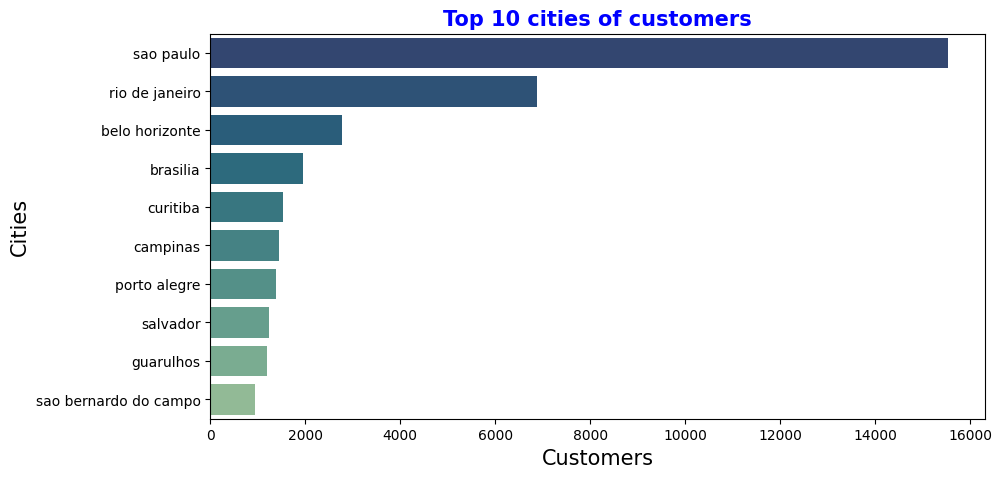

In [ ]:
top_10_city = df_customerorder.customer_city.value_counts().values[:10]
plt.figure(figsize=(10, 5))
sns.barplot(y = df_customerorder.customer_city.value_counts().index[:10],x=top_10_city, palette= 'crest_r')
plt.xlabel('Customers',color='black',fontsize=15)
plt.ylabel('Cities',color='black',fontsize=15)
plt.title('Top 10 cities of customers',color='blue',fontsize=15,fontweight='bold')
plt.show()

# Review Data

In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df_review

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,sentiment_scores
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,"{'neg': 0.0, 'neu': 0.464, 'pos': 0.536, 'comp..."
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
# Vader Sentiment Intensity Analyzer
sen = SentimentIntensityAnalyzer()
sen.polarity_scores("Highly recommend Buying this machine, I love this!")

df_review['sentiment_scores'] = df_review['review_comment_message'].apply(lambda x: sen.polarity_scores(str(x)))
new_review = df_review[['review_score', 'review_comment_message', 'sentiment_scores']]
new_review['compound'] = df_review['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

<ipython-input-33-f6e781427242>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_review['compound'] = df_review['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])


In [ ]:
# Create Review condition
conditions = [
    (new_review['compound']>0) ,
    (new_review['compound']==0),
    (new_review['compound']<0)
    ]

# create a list of the values we want to assign for each condition
values = ['Positive','Neutral','Negative']

# create a new column and use np.select to assign values to it using our lists as arguments
new_review['Review_type'] = np.select(conditions, values)

<ipython-input-34-16948aa420c4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_review['Review_type'] = np.select(conditions, values)


In [ ]:
new_review

,review_score,review_comment_message,sentiment_scores,compound,Review_type
0,4,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,5,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,5,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,5,Recebi bem antes do prazo estipulado.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,5,Parabéns lojas lannister adorei comprar pela I...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
...,...,...,...,...,...
99219,5,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
99220,5,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
99221,5,"Excelente mochila, entrega super rápida. Super...","{'neg': 0.0, 'neu': 0.464, 'pos': 0.536, 'comp...",0.8439,Positive
99222,4,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


In [ ]:
# Filter by review type
positive_reviews = new_review[new_review['Review_type']=='Positive']
negative_reviews = new_review[new_review['Review_type']=='Negative']
# Join text for wordcloud
pos_text = " ".join(review for review in positive_reviews.review_comment_message)
neg_text = " ".join(review for review in negative_reviews.review_comment_message)
# Create wordclouds
pos_cloud = WordCloud(collocations = False, background_color = 'white', colormap = 'coolwarm').generate(pos_text)
neg_cloud = WordCloud(collocations = False, background_color = 'white', colormap = 'coolwarm').generate(neg_text)

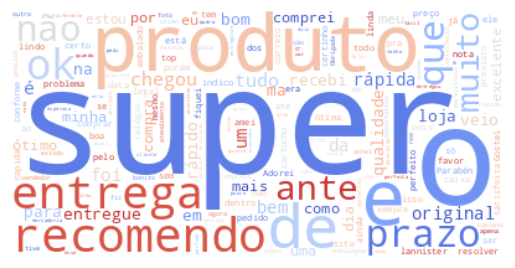

In [ ]:
# Positive wordcloud
plt.imshow(pos_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Negative wordcloud
plt.imshow(neg_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

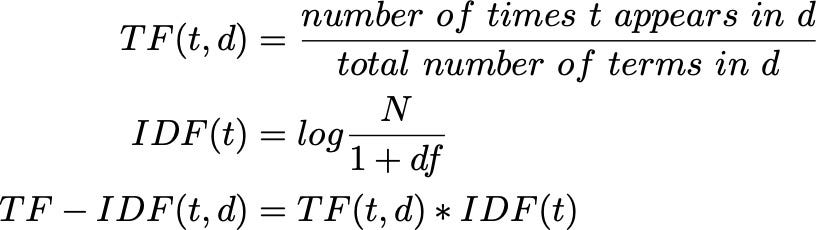

In [ ]:
# Function to clean text data
def clean_text(text):
    # Remove currency symbols, numbers, and convert to lowercase, maintaining spaces
  text = str(text).lower()
  text = re.sub('([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}','', text)
  text = re.sub('[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+','', text)
  text = re.sub('\n', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub(r'(\$?\d+(?:,\d+)*(?:\.\d+)?|\b\d+(?:,\d+)*\b)|[^a-zA-Zá-úÁ-Ú\s]', '', text)
  text = re.sub('([nN][ãÃaA][oO]|[ñÑ]|[nN] )', '', text)
  tokens = nltk.word_tokenize(text)
  filtered_tokens = [word for word in tokens if word not in stop_words_pt]
  text = ' '.join(filtered_tokens)
  return text

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words_pt = stopwords.words('portuguese')
    # Tokenize the text
df_review['cleaned_review'] = df_review['review_comment_message'].apply(clean_text)
def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words_pt)
    return text
  #Stopwords
df_review['cleaned_review'] = df_review['cleaned_review'].apply(remove_stopwords)
df_review.head()

In [ ]:

nltk.download('rslp')
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize

In [ ]:
  #Stemming
stemmer = RSLPStemmer()
df_review['stemmed_words'] = df_review['cleaned_review'].apply(lambda text: [stemmer.stem(word) for word in word_tokenize(text) if word.lower() not in stop_words_pt])

In [ ]:
  #Corpus
def extract_features_from_corpus(corpus, vectorizer, df=False):
    corpus_features = vectorizer.fit_transform(corpus).toarray()
    features_names = vectorizer.get_feature_names_out()
    df_corpus_features = None
    if df:
        df_corpus_features = pd.DataFrame(corpus_features, columns=features_names)

    return corpus_features, df_corpus_features
stemmed_corpus = df_review['cleaned_review'].apply(lambda text: ' '.join([stemmer.stem(word) for word in text.split() if word.lower() not in stop_words_pt]))

In [ ]:
# Creating an object for the CountVectorizer class
count_vectorizer = CountVectorizer(stop_words=stop_words_pt)

In [ ]:
# Creating an object for the CountVectorizer class
tfidf_vectorizer = TfidfVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=stop_words_pt)

# Extracting features for the corpus
tfidf_features, df_tfidf_features = extract_features_from_corpus(stemmed_corpus, tfidf_vectorizer, df=True)
print(f'Shape of tfidf_features matrix: {tfidf_features.shape}\n')
print(f'Example of DataFrame of corpus features:')
df_tfidf_features.head()


In [ ]:
classify = { 1 : 'Not Satisfied',
                  2 : 'Not Satisfied',
                  3 : 'Not Satisfied',
                  4 : 'Satisfied',
                  5 : 'Satisfied'}

df_review['statisfied'] = df_review['review_score'].map(classify)
X = df_tfidf_features
y = df_review['statisfied']

In [ ]:
#Data train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

# Generate confusion matrices for training and testing data
train_conf_matrix = confusion_matrix(y_train, nb.predict(x_train))
test_conf_matrix = confusion_matrix(y_test, nb.predict(x_test))

# Display confusion matrices with corresponding class labels
disp_train = ConfusionMatrixDisplay(confusion_matrix=train_conf_matrix, display_labels=nb.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=nb.classes_)

# Display confusion matrices
disp_train.plot()
disp_test.plot()

print('Evaluation on Training \n', classification_report(y_train, nb.predict(x_train)))
print('Evaluation on Testing \n', classification_report(y_test, nb.predict(x_test)))



In [ ]:
# Filter by review type
negative_reviews = df_review[df_review['statisfied']=='Not Satisfied']
negative_reviews.reset_index(inplace= True, drop= True)


In [ ]:
negative_reviews = negative_reviews.dropna(subset=['review_comment_message'])

In [ ]:
comment = negative_reviews['review_comment_message'].apply(clean_text)

In [ ]:
# Join text for wordcloud
neg_text = " ".join(review for review in comment)
# Create wordclouds
neg_cloud = WordCloud(collocations = False, background_color = 'white', colormap = 'coolwarm').generate(neg_text)

In [ ]:
non_satisfied_freq = neg_cloud.process_text(neg_text)
sorted_word_frequencies = sorted(non_satisfied_freq.items(), key= lambda x : x[1], reverse=True)

In [ ]:
# Plot Words vs Frequency
plt.figure(figsize= [20, 10])
sns.barplot(x = pd.DataFrame(sorted_word_frequencies)[1:20][0], y= pd.DataFrame(sorted_word_frequencies)[1:20][1], palette= 'crest_r')
plt.title('Top 20 Negative Words and their Frequency', fontsize= 15)
plt.xlabel('Words', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
sns.despine()

# **Competitor**

In [ ]:
df_amazon.drop(columns = ['description','feature','brand','itemName'])

In [ ]:
df_amazon.dtypes

As did not have order_time I assump that those user wh

In [ ]:
#RFM table
amazon_rfm = df_amazon[['userName','price','reviewTime','rating']]
amazon_rfm = amazon_rfm.dropna(subset=['price', 'userName'])
amazon_rfm['price'] = pd.to_numeric(amazon_rfm['price'], errors='coerce')
amazon_rfm.isna().sum()

In [ ]:
amazon_rfm['reviewTime'] = pd.to_datetime(amazon_rfm['reviewTime'])

# Calculate Recency, Frequency, and Monetary values
reference_date = amazon_rfm['reviewTime'].max()  # Reference date for recency calculation

# Calculate Recency (number of days since last review)
amazon_rfm['Recency'] = (reference_date - amazon_rfm['reviewTime']).dt.days

# Calculate Frequency (number of reviews per user)
frequency = amazon_rfm.groupby('userName').size().reset_index(name='Frequency')
amazon_rfm = amazon_rfm.merge(frequency, on='userName', how='left')

# Calculate Monetary value (total purchase value per user)
monetary = amazon_rfm.groupby('userName')['price'].sum().reset_index(name='Monetary')
amazon_rfm = amazon_rfm.merge(monetary, on='userName', how='left')
# Calculate Average Rating per User
avg_rating = amazon_rfm.groupby('userName')['rating'].mean().reset_index(name='AvgRating')
amazon_rfm = amazon_rfm.merge(avg_rating, on='userName', how='left')

In [ ]:
# Calculate RFM scores
amazon_rfm['R_score'] = pd.qcut(amazon_rfm['Recency'], q=5, labels=False, duplicates='drop') + 1
amazon_rfm['F_score'] = pd.qcut(amazon_rfm['Frequency'], q=5, labels=False, duplicates='drop') + 1
amazon_rfm['M_score'] = pd.qcut(amazon_rfm['Monetary'], q=5, labels=False, duplicates='drop') + 1

# Calculate overall RFM score
amazon_rfm['RFM_Score'] = amazon_rfm['R_score'].astype(str) + amazon_rfm['F_score'].astype(str) + amazon_rfm['M_score'].astype(str)
amazon_rfm['RFM_Score'] = pd.to_numeric(amazon_rfm['RFM_Score'], errors='coerce')


In [ ]:
amazon_rfm.dtypes

In [ ]:
def customer_segmenation(rfm_score):

  if rfm_score == 555:
    return 'VIP'

  elif  rfm_score >= 443 and rfm_score < 555:
    return 'Very Loyal'

  elif   rfm_score >=421 and rfm_score< 443:
    return 'Potential Loyalist'

  elif rfm_score>=344 and rfm_score < 421:
    return 'New customers'

  elif rfm_score>=323 and rfm_score<344:
    return 'Potential customer'

  elif rfm_score>=224 and rfm_score<311:
    return 'High risk to churn'

  else:
    return 'Lost customers'

amazon_rfm['customer_segmentation'] = amazon_rfm['RFM_Score'].apply(customer_segmenation)

amazon_rfm

In [ ]:
# Group product category
review_cat_amazon = df_amazon.groupby('category')[['rating']].mean().sort_values(by='rating', ascending=False)
review_cat_amazon.reset_index(inplace=True)

In [ ]:

# Plot Product Category vs Review Score
plt.figure(figsize=[10, 5])
sns.barplot(x = review_cat_amazon.rating, y= review_cat_amazon.category, palette= 'crest_r')
plt.title('Average Review Score per Product Category', fontsize= 15)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Product Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False)

In [ ]:
unique_values = df_amazon['category'].unique()
print(unique_values)

In [ ]:
# Create a new index as a representation of 'order_id'
df_amazon['order_id'] = range(1, len(df_amazon) + 1)

In [ ]:
# Sequential orders analysis
a = df_amazon.groupby('userName')['order_id'].count().reset_index()
a.columns = ['userName', 'customers']
a.sort_values(by = 'customers')
total_orders_count = a['customers'].value_counts().reset_index()
b = df_amazon['userName'].nunique()
total_orders_count['percentage'] = (total_orders_count['customers'] / b)*100
total_orders_count

In [ ]:
total_orders_count['customers'].sum()

In [ ]:
a.sort_values(by = 'customers')

# Merge File

In [ ]:
#Merge dataframe
df_final = df_customer.merge(df_order, on = 'customer_id').merge(df_item, on = 'order_id').merge(df_product, on = 'product_id', how = 'left').merge(df_geolocation, left_on = 'customer_zip_code_prefix',right_on = 'geolocation_zip_code_prefix').merge(df_payment, on = 'order_id').merge(df_seller, on = 'seller_id').merge(df_cat, on = 'product_category_name').merge(df_review,on = 'order_id', how = 'left')

In [ ]:
df_final.info()

In [ ]:
'''# Group product category
review_cat = df_final.groupby('product_cat')[['review_score']].mean().sort_values(by='review_score', ascending=False)
review_cat.reset_index(inplace=True)

# Plot Product Category vs Review Score
plt.figure(figsize=[10, 5])
sns.barplot(x = review_cat.review_score, y= review_cat.product_cat, palette= 'crest_r')
plt.title('Average Review Score per Product Category', fontsize= 15)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Product Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);'''

In [ ]:
top_categ_by_revenue = df_final.groupby("product_cat").agg({'order_id':'nunique','payment_value':'sum'}).sort_values("payment_value", ascending=False)[:10]
top_categ_by_revenue.rename(columns={"order_id":"NumOfOrders", "payment_value":"Revenues"}, inplace=True)

In [ ]:
'''plt.figure(figsize=(18, 6))

# Plotting Number of Orders as a line plot
ax1 = plt.gca()
top_categ_by_revenue['NumOfOrders'].plot(kind='line', color='green', marker='o', ax=ax1)
ax1.set_ylabel('Number of Orders', color='green')

# Creating a bar plot for Revenues on the same chart
ax2 = ax1.twinx()
top_categ_by_revenue['Revenues'].plot(kind='bar', color='blue', alpha=0.5, ax=ax2)
ax2.set_ylabel('Total Revenue', color='blue')

# Setting labels and title
plt.title('Comparison of Number of Orders and Revenues for Top Product Categories')
ax1.set_xlabel('Product Category')

# Show legend for both plots
lines, labels = ax1.get_legend_handles_labels()
bars, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + bars, labels + labels2, loc='upper right')
plt.show()'''

In [ ]:
# Calculate percentage values for ratings in both DataFrames
amazon_scores = df_amazon['rating'].value_counts(normalize=True) * 100
final_scores = df_final['review_score'].value_counts(normalize=True) * 100

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
amazon_scores.plot(kind='bar', color='blue', alpha=0.7, position=0, width=0.4, label='Amazon', ax=ax)
final_scores.plot(kind='bar', color='green', alpha=0.7, position=1, width=0.4, label='Olist', ax=ax)

# Add percentage labels to each bar with adjusted positions
for i, val in enumerate(amazon_scores):
    plt.text(i, val + 1, f'{val:.2f}%', color='blue', fontsize=8, fontweight='bold')

for i, val in enumerate(final_scores):
    plt.text(i-0.4, val + 1, f'{val:.2f}%', color='black', fontsize=8, fontweight='bold')

# Set labels and title
ax.set_xlabel('Review Score')
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Review Scores: Amazon vs Olist')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Get last transaction date to help calculate Recency
max_trans_date = max(df_final.order_purchase_timestamp).date()
max_trans_date

In [ ]:
from datetime import datetime
rfm_table = df_final.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x:(datetime.strptime(str(max_trans_date),'%Y-%m-%d') - x.max()).days,
                                                                'customer_id': 'count',
                                                             'payment_value': lambda x:sum(x),
                                                        'review_score': 'mean'})
rfm_table

In [ ]:
# Rename columns
rfm_table.rename(columns={'order_purchase_timestamp':'Recency','customer_id':'Frequency','payment_value':'Monetary','review_score': 'avg_review_score'}, inplace=True)
rfm_table

In [ ]:
rfm_table['r_score'] = pd.qcut(rfm_table['Recency'], q=5, labels=False, duplicates='drop') + 1
rfm_table['f_score'] = pd.qcut(rfm_table['Frequency'], q=5, labels=False, duplicates='drop') + 1
rfm_table['m_score'] = pd.qcut(rfm_table['Monetary'], q=5, labels=False, duplicates='drop') + 1
rfm_table['rfm_score'] = 100 * rfm_table['r_score'].astype(int) + 10 * rfm_table['f_score'].astype(int)+ rfm_table['m_score'].astype(int)
rfm_table


In [ ]:
rfm_table['customer_segmentation'] = rfm_table['rfm_score'].apply(customer_segmenation)

rfm_table

In [ ]:
# Calculate segment percentages for amazon_rfm
amazon_segment_percentages = amazon_rfm['customer_segmentation'].value_counts(normalize=True) * 100

# Calculate segment percentages for rfm_table
rfm_segment_percentages = rfm_table['customer_segmentation'].value_counts(normalize=True) * 100

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for amazon_rfm
axes[0].bar(amazon_segment_percentages.index, amazon_segment_percentages.values, color='skyblue')
axes[0].set_title('Amazon Customer Segmentation')
axes[0].set_xlabel('Segments')
axes[0].set_ylabel('Percentage of Customers')
axes[0].tick_params(axis='x', rotation=45)
for i, val in enumerate(amazon_segment_percentages):
    axes[0].text(i, val + 1, f'{val:.2f}%', ha='center', va='bottom', fontsize=8)

# Plot for rfm_table
axes[1].bar(rfm_segment_percentages.index, rfm_segment_percentages.values, color='lightgreen')
axes[1].set_title('Olist Customer Segmentation')
axes[1].set_xlabel('Segments')
axes[1].set_ylabel('Percentage of Customers')
axes[1].tick_params(axis='x', rotation=45)
for i, val in enumerate(rfm_segment_percentages):
    axes[1].text(i, val + 1, f'{val:.2f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
rfm_table.r_score.value_counts()

In [ ]:
rfm_table.f_score.value_counts()

In [ ]:
rfm_table.m_score.value_counts()

# **Relationship between delivery and review score**

In [ ]:
#Avg delivery duration
avg_received_order = df_order.order_purchase_timestamp - df_order.order_delivered_customer_date
avg_received_order = avg_received_order.apply(lambda x: -1* (x.days))
avg_received_order.mean()

In [ ]:
df_final['order_status'].value_counts(normalize = True)


In [ ]:
# Contingency table of order status vs. review score
relationship = pd.crosstab(df_final['order_status'], df_final['review_score'])
#table of order status vs. review score
def categorize_delivery_time(x):
    if x <= 15:
        return f"{x}"
    elif 15 < x <= 20:
        return ">15-20 days"
    else:
        return ">20 days"
df_final['delivery_group'] = df_final['purchased_delivered'].apply(categorize_delivery_time)
relationship1 = pd.crosstab(df_final['delivery_group'], df_final['review_score'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plotting the first heatmap (Order Status vs. Review Score)
sns.heatmap(relationship, cmap='Blues', annot=True, fmt='d', ax=axes[0])
axes[0].set_title('Order Status vs. Review Score', fontsize=16)
axes[0].set_xlabel('Review Score', fontsize=14)
axes[0].set_ylabel('Order Status', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=12)
sns.despine(ax=axes[0])

# Plotting the second heatmap (Delivery vs. Review Score)
sns.heatmap(relationship1, cmap='Blues', annot=True, fmt='d', ax=axes[1])
axes[1].set_title('Delivery vs. Review Score', fontsize=16)
axes[1].set_xlabel('Review Score', fontsize=14)
axes[1].set_ylabel('Number of delivery day', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=12)
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()

In [ ]:
df_final['shipping_limit_date'] = pd.to_datetime(df_final['shipping_limit_date'])
df_final['review_comment_title'] = df_final['review_comment_title'].fillna('')
df_final['review_comment_message'] = df_final['review_comment_message'].fillna('')
# Mutate is_reviewed column
df_final['is_reviewed'] = df_final.apply(lambda row: 1 if row['review_comment_title'] != "" or row['review_comment_message'] != "" else 0, axis=1)

# Create indicator column for delivered_on_time
df_final['delivered_on_time'] = df_final.apply(lambda row: 1 if pd.notnull(row['order_delivered_customer_date']) and
                                            row['order_delivered_customer_date'] <= row['order_estimated_delivery_date']
                                         else 0, axis=1)
#column for shipped_on_time
df_final['shipped_on_time'] = df_final.apply(lambda row: 1 if pd.notnull(row['order_delivered_carrier_date']) and
                                            row['order_delivered_carrier_date'] <= row['shipping_limit_date']
                                         else 0, axis=1)


In [ ]:
delivery_test = df_final[['order_id','review_score', 'order_status', 'shipped_on_time', 'delivered_on_time', 'purchased_delivered', 'payment_sequential',
     'payment_installments', 'payment_value', 'price', 'freight_value', 'is_reviewed','delivered_estimated']]
delivery_test = delivery_test.drop_duplicates(subset='order_id', keep='first')
# Count of missing values in each column
missing_values_count = delivery_test.isna().sum()
print(missing_values_count)

# Dimensions of the dataset (number of rows and columns)
dimensions = delivery_test.shape
print(dimensions)



In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='review_score', y='purchased_delivered', data=delivery_test, palette='Dark2')
plt.title('Review Score vs Delivery Time')
plt.xlabel('Review Score')
plt.ylabel('Delivery Time')
plt.show()

In [ ]:
#Convert delivered status into binary variable
delivery_test['order_status_delivered']= delivery_test['order_status'].str.startswith('delivered').astype(int)

In [ ]:
delivery_test = delivery_test.dropna(subset=['review_score', 'purchased_delivered'])

In [ ]:
delivery_test.isna().sum()
delivery_test = delivery_test.drop(['order_id','order_status'], axis=1)

In [ ]:
delivery_test.corr()

In [ ]:
from sklearn.linear_model import LinearRegression
X = delivery_test.drop('review_score', axis=1)  # Features
y = delivery_test['review_score']  # Target variable

# Create a Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(delivery_test.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()







In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

In [ ]:
rfm_table['Churn'] = rfm_table.Recency.apply(lambda x: 1 if x > rfm_table.Recency.mean() else 0)


In [ ]:
rfm_table = rfm_table.merge(df_final[['customer_unique_id','customer_zip_code_prefix','customer_state','purchased_approved','delivered_estimated','purchased_delivered' ]], on ='customer_unique_id' )

In [ ]:
features = rfm_table.copy()
features.drop(columns = ['customer_unique_id',	'customer_zip_code_prefix', 'customer_state', 'customer_segmentation','r_score','rfm_score'], axis = 1, inplace = True)

In [ ]:
independent = features.drop(columns = ['Churn'], axis = 1)
df_target = features['Churn'].astype('int')


In [ ]:
X = independent
X.drop(columns = ['Recency'], axis = 1, inplace = True)
y = df_target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
independent

In [ ]:
model = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1)
model.fit(X_train, y_train)

# Evaluate AUC score
predictions = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, predictions)
print('AUC score: ', auc)

# Get feature importances
print(model.feature_importances_)

In [ ]:
ypred_xg = [0 if i < 0.5 else 1 for i in predictions]
ypred_xg[:10]

In [ ]:
cm = confusion_matrix(y_test, ypred_xg)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
print(classification_report(y_test, ypred_xg))